In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


train_df = pd.read_csv('../../data/train.csv')    #keeping only numerical columns 
train_df.head()



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [105]:
feature_category_set = {'tBodyAcc'}

for column in train_df.columns :

    hyphen_index = column.find('-')
    if hyphen_index > 0 :
        feature_category = column[0  : column.find('-')]
        feature_category_set.add(feature_category)
    else :
        feature_category = column
   
    print('| ' + column + ' | |' )

#print(sorted(feature_category_set))
feature_category_set = sorted(feature_category_set)
for feature in sorted(feature_category_set) :
    print('| ' + feature + ' | |')



| tBodyAcc-mean()-X | |
| tBodyAcc-mean()-Y | |
| tBodyAcc-mean()-Z | |
| tBodyAcc-std()-X | |
| tBodyAcc-std()-Y | |
| tBodyAcc-std()-Z | |
| tBodyAcc-mad()-X | |
| tBodyAcc-mad()-Y | |
| tBodyAcc-mad()-Z | |
| tBodyAcc-max()-X | |
| tBodyAcc-max()-Y | |
| tBodyAcc-max()-Z | |
| tBodyAcc-min()-X | |
| tBodyAcc-min()-Y | |
| tBodyAcc-min()-Z | |
| tBodyAcc-sma() | |
| tBodyAcc-energy()-X | |
| tBodyAcc-energy()-Y | |
| tBodyAcc-energy()-Z | |
| tBodyAcc-iqr()-X | |
| tBodyAcc-iqr()-Y | |
| tBodyAcc-iqr()-Z | |
| tBodyAcc-entropy()-X | |
| tBodyAcc-entropy()-Y | |
| tBodyAcc-entropy()-Z | |
| tBodyAcc-arCoeff()-X,1 | |
| tBodyAcc-arCoeff()-X,2 | |
| tBodyAcc-arCoeff()-X,3 | |
| tBodyAcc-arCoeff()-X,4 | |
| tBodyAcc-arCoeff()-Y,1 | |
| tBodyAcc-arCoeff()-Y,2 | |
| tBodyAcc-arCoeff()-Y,3 | |
| tBodyAcc-arCoeff()-Y,4 | |
| tBodyAcc-arCoeff()-Z,1 | |
| tBodyAcc-arCoeff()-Z,2 | |
| tBodyAcc-arCoeff()-Z,3 | |
| tBodyAcc-arCoeff()-Z,4 | |
| tBodyAcc-correlation()-X,Y | |
| tBodyAcc-correlation

In [106]:
train_df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [107]:
train_df.shape

(7352, 563)

In [108]:
test_df = pd.read_csv('../../data/test.csv')    #keeping only numerical columns 
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [109]:
test_df.shape

(2947, 563)

In [110]:
## Exploratory Data Analysis

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [111]:
train_df.isna().sum()


tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [112]:
train_df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

<Axes: xlabel='Activity', ylabel='count'>

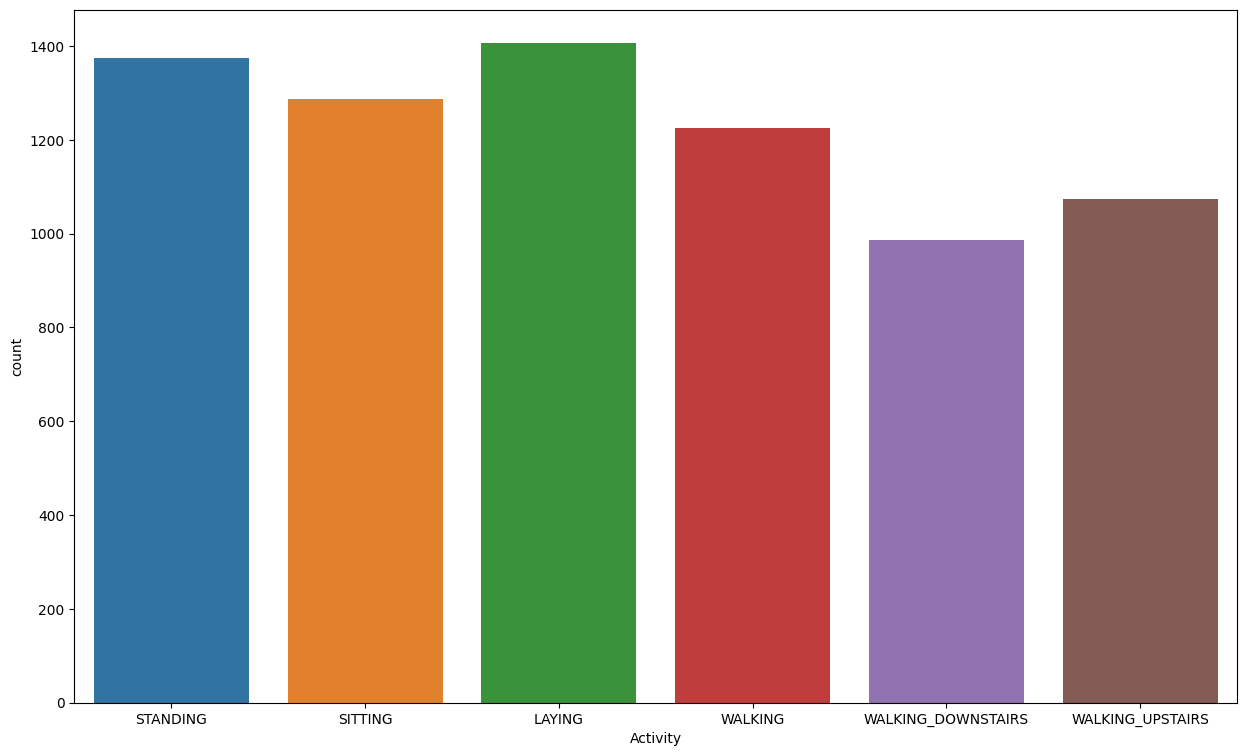

In [113]:
## Is class balanced

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))
sns.countplot(x= "Activity", hue="Activity", data=train_df, dodge=False)

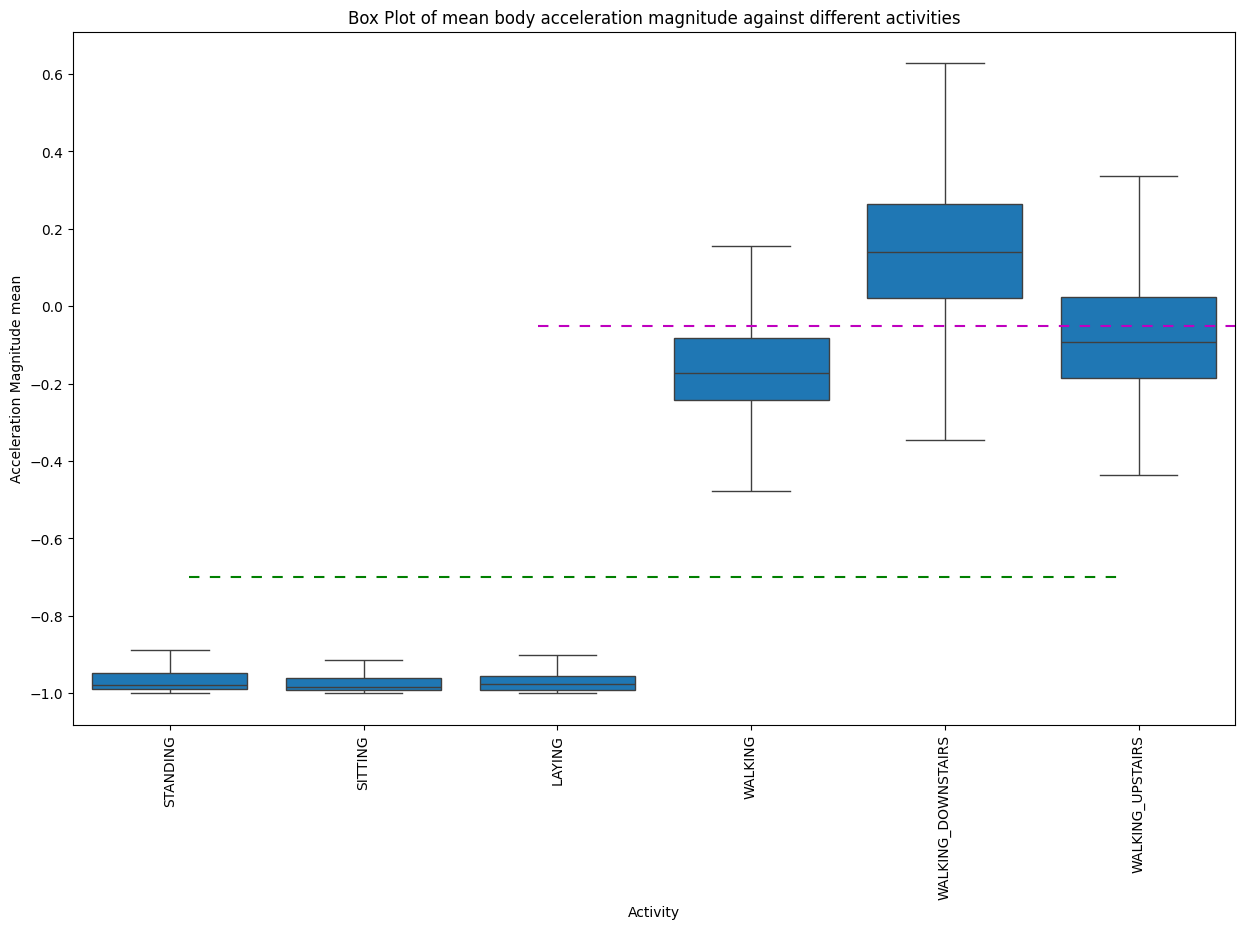

In [114]:
## Analysis of few features and its relation to classes

# mean body acceleration magnitude


plt.figure(figsize=(15,9))
# box plot for different activities for mean body acceleration magnitude
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_df, showfliers=False, saturation=1)

plt.title('Box Plot of mean body acceleration magnitude against different activities')
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')

plt.xticks(rotation=90)
plt.show()

#Observation: Based on the body acceleration magnitude mean, the observation are:

#acc < -0.8 are static activities
#acc > -0.6 are dynamic activities
#acc > 0 is walking downstairs

In [115]:
from sklearn.preprocessing import LabelEncoder

# Separate features and target in training data
X_train = train_df.drop('Activity', axis=1)  #Feature (input colmunns)
y_train = train_df['Activity']               #Target (output column)

# Encode target labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)    


#print('Original Data:', activity_data)
#print('Encoded Data:', encoded_data)
print('Category Mapping:', dict(zip(train_df['Activity']  , y_train))) 




# Separate features and target in testing data

X_test = test_df.drop('Activity', axis=1)  #Feature (input colmunns)
y_test = test_df['Activity']  #Target (output colmunns)
y_test = le.fit_transform(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


Category Mapping: {'STANDING': 2, 'SITTING': 1, 'LAYING': 0, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}
(7352, 562)
(2947, 562)
(7352,)
(2947,)


In [116]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

from sklearn.metrics import classification_report
print('Classification report for Logistic regression without regularization:')
print(classification_report(y_test,y_pred))


Test accuracy: 0.9599592806243638
Classification report for Logistic regression without regularization:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.87      0.92       491
           2       0.89      0.98      0.94       532
           3       0.94      0.99      0.97       496
           4       0.99      0.97      0.98       420
           5       0.97      0.94      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



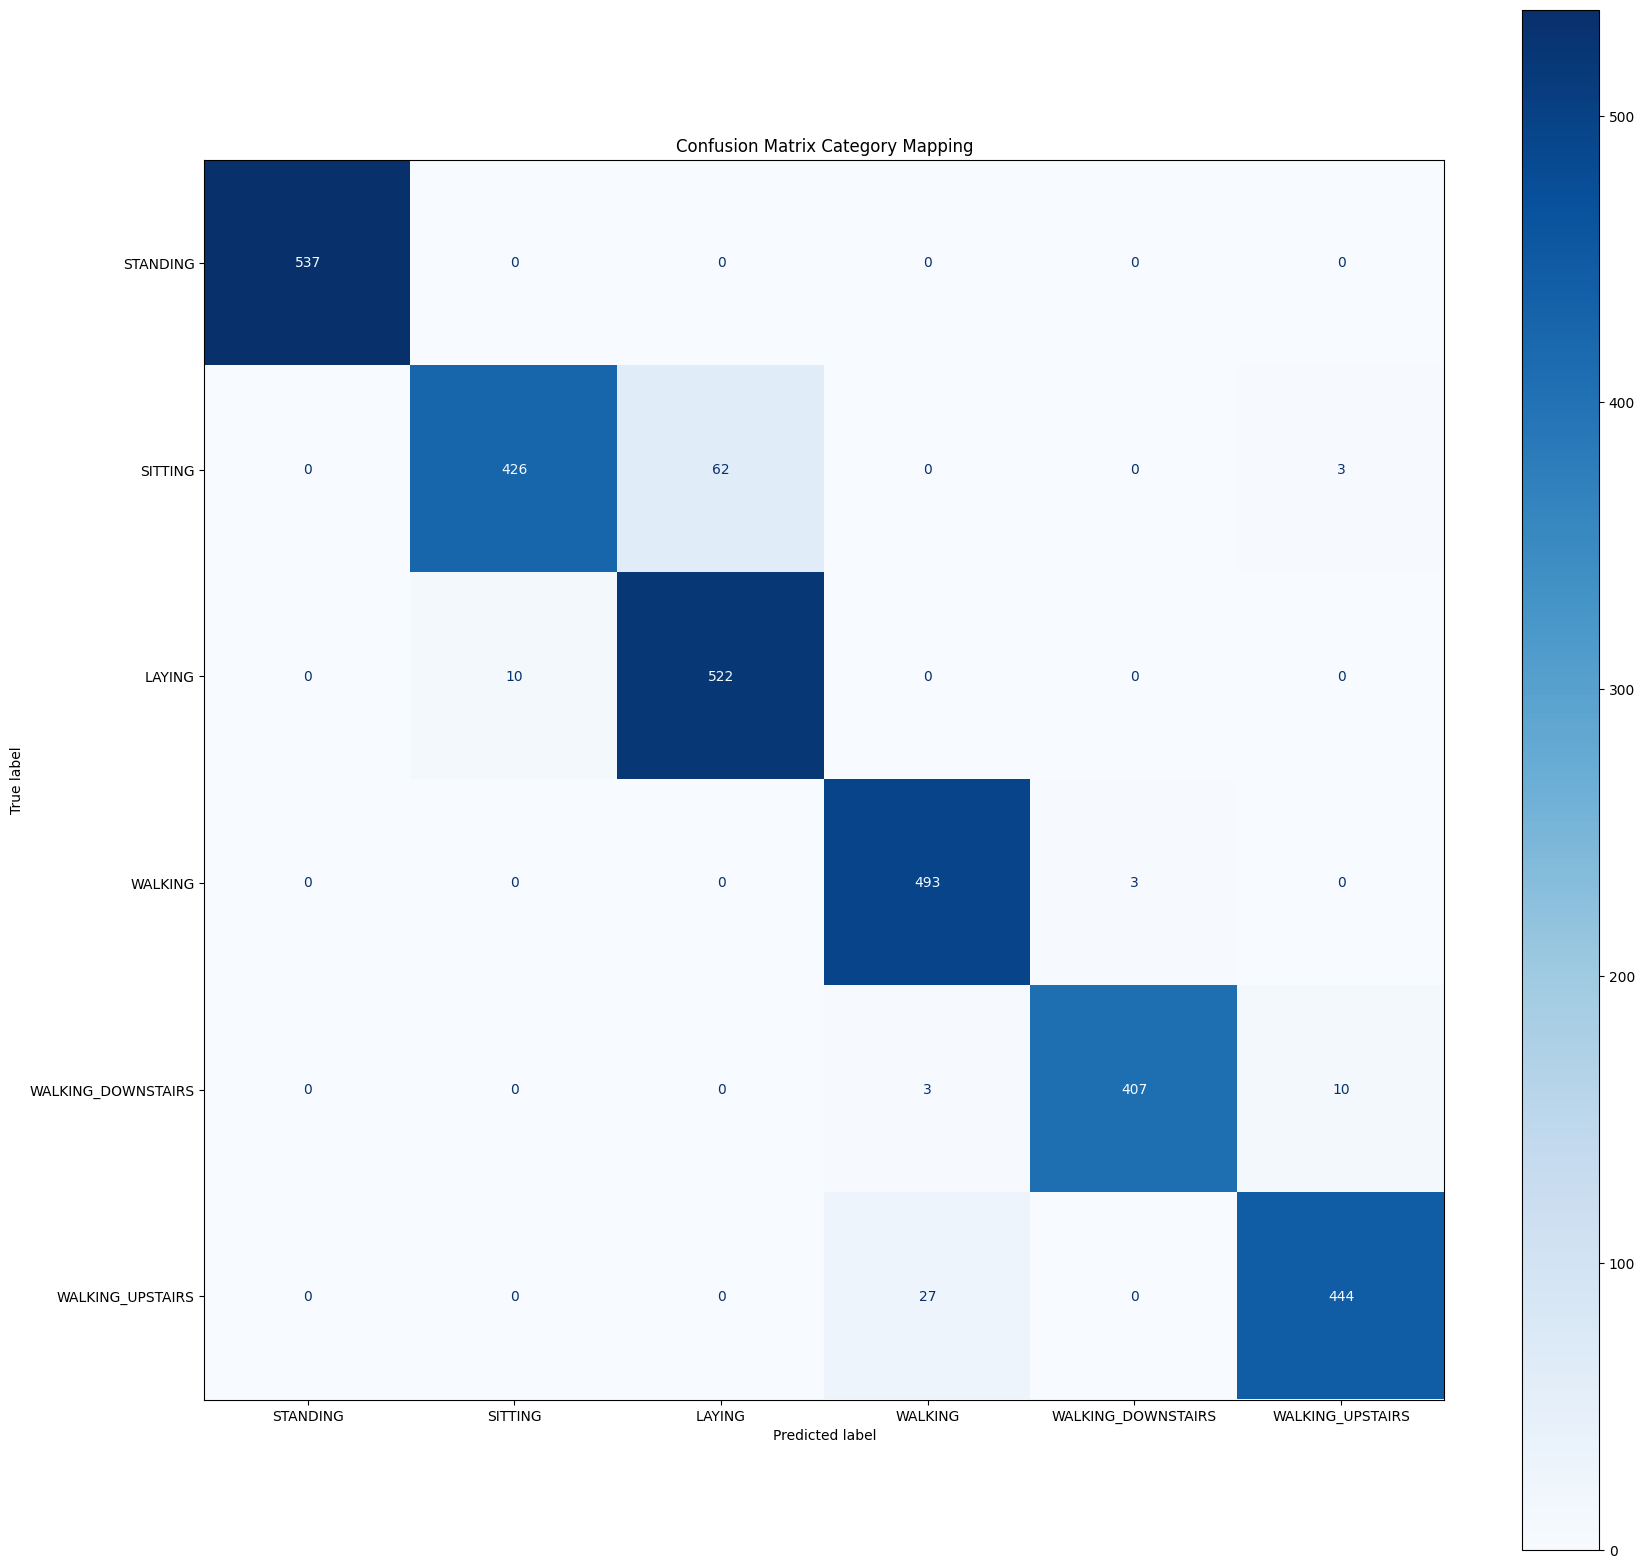

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= train_df.Activity.unique())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Category Mapping')
fig = disp.figure_
fig.set_figwidth(20)
fig.set_figheight(20)
plt.show()

In [118]:
## LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_lstm_model(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))
    return model


def train_lstm_model(X_train, Y_train, X_val, Y_val, batch_size=32, epochs=50):
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]), len(np.unique(Y_train)))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, Y_val), callbacks=[early_stopping], verbose=1)
    return model, history

Epoch 1/50


c:\swararoy\install_home\python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7473 - loss: 0.6753 - val_accuracy: 0.9348 - val_loss: 0.1688
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9460 - loss: 0.1384 - val_accuracy: 0.9257 - val_loss: 0.1961
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9618 - loss: 0.0988 - val_accuracy: 0.9315 - val_loss: 0.1801
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9696 - loss: 0.0832 - val_accuracy: 0.9410 - val_loss: 0.1733
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9723 - loss: 0.0756 - val_accuracy: 0.9247 - val_loss: 0.2030
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9721 - loss: 0.0716 - val_accuracy: 0.9352 - val_loss: 0.1899


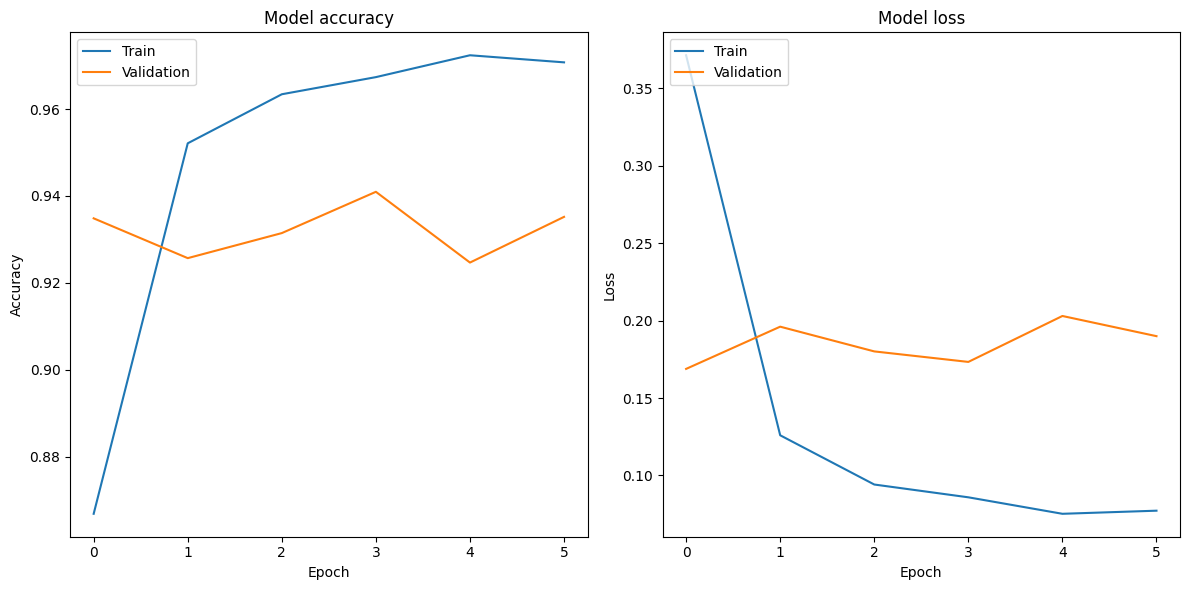

In [119]:
X_train=train_df.drop('Activity',axis=1)
Y_train=train_df['Activity']
X_test=test_df.drop('Activity',axis=1)
Y_test=test_df['Activity']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)



X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Train LSTM model
lstm_model, lstm_history = train_lstm_model(X_train_reshaped, Y_train_encoded, 
                                            X_test_reshaped, Y_test_encoded)

# Plot training and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Testing Accuracy: 0.9348489989820156
Confusion Matrix:
[[518   4  15   0   0   0]
 [  1 423  65   0   0   2]
 [  0  28 504   0   0   0]
 [  0   0   0 481   8   7]
 [  0   0   0  13 377  30]
 [  0   0   0  12   7 452]]


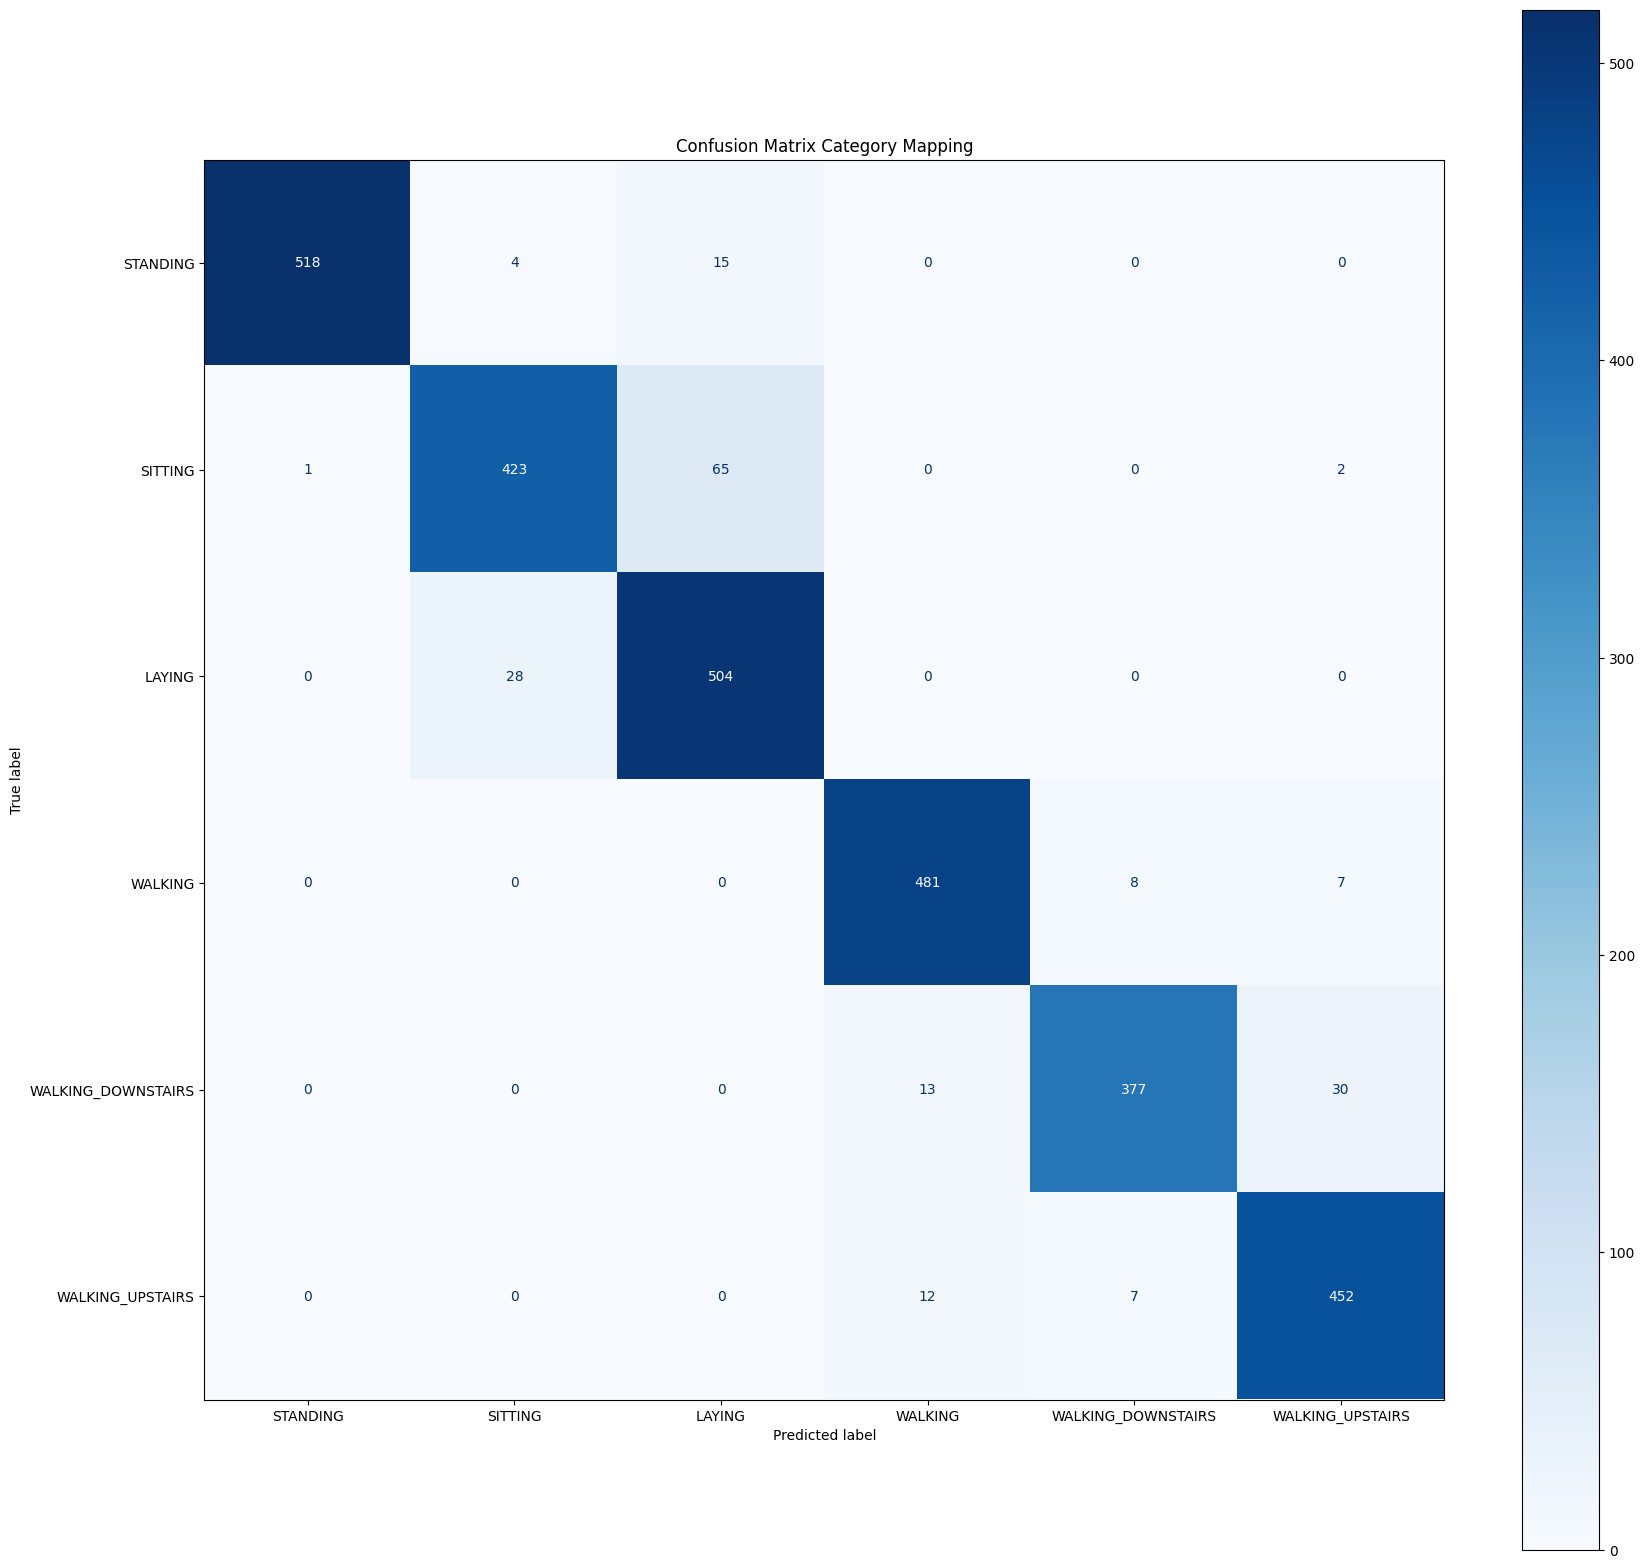

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, Y_test):
   Y_pred_prob = model.predict(X_test)
   Y_pred = np.argmax(Y_pred_prob, axis=1)
   testing_accuracy = accuracy_score(Y_test, Y_pred)
   print("Testing Accuracy:", testing_accuracy)
   conf_matrix = confusion_matrix(Y_test, Y_pred)
   print("Confusion Matrix:")
   print(conf_matrix)
    
   
   # Plot the confusion matrix
   disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= train_df.Activity.unique())
   disp.plot(cmap=plt.cm.Blues)
   plt.title('Confusion Matrix Category Mapping')
   fig = disp.figure_
   fig.set_figwidth(20)
   fig.set_figheight(20)
   plt.show()
    
   return testing_accuracy, conf_matrix

# Evaluate LSTM model
testing_accuracy, conf_matrix = evaluate_model(lstm_model, X_test_reshaped, Y_test_encoded)

In [121]:
## Feature Selection

# Perform duplicate column removal

def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]
        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

train_df_duplicate_remove = pd.read_csv('../../data/train.csv')    #keeping only numerical columns 
train_df_duplicate_remove.head()

test_df_duplicate_remove = pd.read_csv('../../data/test.csv')    #keeping only numerical columns 
test_df_duplicate_remove.head()

dc = get_duplicate_columns(train_df_duplicate_remove)

dc

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [122]:
train_df_duplicate_remove[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
0,-0.959434,-0.959434,-0.959434,-0.959434
1,-0.979289,-0.979289,-0.979289,-0.979289
2,-0.983703,-0.983703,-0.983703,-0.983703
3,-0.986542,-0.986542,-0.986542,-0.986542
4,-0.992827,-0.992827,-0.992827,-0.992827
...,...,...,...,...
7347,-0.031719,-0.031719,-0.031719,-0.031719
7348,-0.065256,-0.065256,-0.065256,-0.065256
7349,-0.003936,-0.003936,-0.003936,-0.003936
7350,-0.002445,-0.002445,-0.002445,-0.002445


In [123]:
for one_list in dc.values():
    train_df_duplicate_remove.drop(columns=one_list,inplace=True)
    test_df_duplicate_remove.drop(columns=one_list,inplace=True)

print(train_df_duplicate_remove.shape)
print(test_df_duplicate_remove.shape)

## Feature count reduced to 542 to 563

(7352, 542)
(2947, 542)


<Axes: >

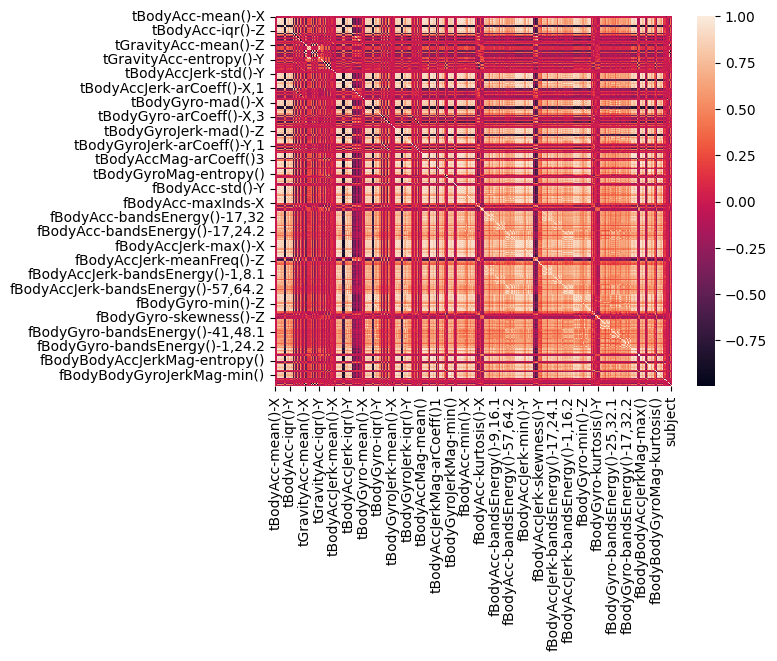

In [124]:
# Utilizing the correlation coefficient as a criterion for feature selection involves strategically dropping columns
# that exhibit strong linear relationships. 

import seaborn as sns

# Separate features and target in training data
X_train_feature_selection = train_df_duplicate_remove.drop('Activity', axis=1)  #Feature (input colmunns)
y_train_feature_selection = train_df_duplicate_remove['Activity']               #Target (output column)



X_test_feature_selection = test_df_duplicate_remove.drop('Activity', axis=1)  #Feature (input colmunns)
y_test_feature_selection = test_df_duplicate_remove['Activity']   

sns.heatmap(X_train_feature_selection.corr())

In [125]:
corr_matrix = X_train_feature_selection.corr()

print(corr_matrix)

                                      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
tBodyAcc-mean()-X                              1.000000           0.148061   
tBodyAcc-mean()-Y                              0.148061           1.000000   
tBodyAcc-mean()-Z                             -0.256952          -0.078769   
tBodyAcc-std()-X                               0.000619          -0.045160   
tBodyAcc-std()-Y                              -0.021903          -0.044920   
...                                                 ...                ...   
angle(tBodyGyroJerkMean,gravityMean)           0.028844           0.075679   
angle(X,gravityMean)                          -0.035257          -0.005309   
angle(Y,gravityMean)                           0.034371           0.001053   
angle(Z,gravityMean)                           0.028242          -0.013903   
subject                                        0.024181          -0.003144   

                                      tBodyAcc-mean()-Z  tBodyA

In [126]:
# Create an empty list to keep track of columns to drop
columns_to_drop = []
columns = corr_matrix.columns

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

columns_to_drop = set(columns_to_drop)

print(columns_to_drop)
print(len(columns_to_drop))

{'tBodyGyroJerkMag-max()', 'fBodyBodyGyroJerkMag-max()', 'tBodyGyroJerk-max()-Z', 'fBodyAcc-mean()-Y', 'fBodyGyro-entropy()-Y', 'tBodyGyroMag-mad()', 'tBodyGyroJerk-mad()-Z', 'fBodyAccJerk-bandsEnergy()-17,32.2', 'tBodyAcc-mad()-Z', 'fBodyAcc-std()-Y', 'tBodyAccJerk-max()-X', 'fBodyAcc-bandsEnergy()-1,24.2', 'fBodyGyro-energy()-Y', 'tBodyGyroMag-iqr()', 'fBodyAccMag-max()', 'tGravityAcc-iqr()-X', 'fBodyAccJerk-bandsEnergy()-1,16.2', 'fBodyBodyAccJerkMag-iqr()', 'fBodyGyro-bandsEnergy()-17,32.1', 'fBodyAcc-bandsEnergy()-1,24.1', 'fBodyAccJerk-max()-Z', 'tBodyGyro-max()-Y', 'tBodyGyro-iqr()-X', 'fBodyGyro-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-49,64.2', 'fBodyAccJerk-mean()-X', 'fBodyAccMag-kurtosis()', 'tBodyGyroMag-max()', 'fBodyGyro-bandsEnergy()-1,24.1', 'fBodyBodyGyroJerkMag-kurtosis()', 'tBodyAccJerk-max()-Z', 'fBodyBodyAccJerkMag-energy()', 'tBodyGyroJerk-mad()-X', 'fBodyBodyGyroMag-entropy()', 'fBodyGyro-bandsEnergy()-1,8', 'fBodyAccJerk-bandsEnergy()-17,24.2', 'tGravityAc

In [127]:
X_train_feature_selection.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test_feature_selection.drop(columns = columns_to_drop, axis = 1, inplace=True)

print(X_train_feature_selection.shape)
print(X_test_feature_selection.shape)

## Feature count reduced to 270 to 542

(7352, 270)
(2947, 270)
